Importing required libraries to predict acceleration using random forest, calculate RMSE (RootMeanSquaredError), and create plots to compare predicted and actual acceleration

In [1]:
import pandas as pd
import numpy as np

#import src
import FileProcessing
import ModelClass
from asyncio.windows_events import NULL
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D
import tensorflow
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from pathlib import Path
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import FileProcessing

In [2]:
fileProcessing=FileProcessing.FileProcessing()

In [3]:
model_obj=ModelClass.ModelClass()
file=FileProcessing.FileProcessing()

In [4]:
file_name='Cleaned_NGSIM_Data'
ngsim=fileProcessing.read_input(file_name)

file_name='Plot_Pairs_NGSIM_Data'
trajectory_display=fileProcessing.read_input(file_name)

original File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\scripts
Data File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\data
original File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\scripts
Data File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\data


In [8]:
ngsim.columns

Index(['Vehicle_ID', 'Frame_ID', 'Global_Time', 'Local_X', 'Local_Y',
       'v_length', 'v_Class', 'v_Vel', 'v_Acc', 'Lane_ID', 'Preceding',
       'Following', 'Space_Headway', 'Time_Headway', 'Location',
       'Preceding_Vehicle_Class', 'Rear_to_Front_Space_Headway',
       'Front_To_Rear_Time_Headway', 'Velocity Difference_Following-Preceding',
       'Acceleration Difference_Following-Preceding', 'L-F_Pair',
       'v_Class_Name', 'Vehicle_combination', 'preceding_vehicle_length',
       'lane_changes', 'Prec_Vehicle_ID', 'preceding_Vehicle_Velocity',
       'preceding_Vehicle_Acceleration', 'preceding_car_lane_changes',
       'preceding_Local_Y', 'preceding_v_Class', 'pair_Time_Duration',
       'total_pair_duration'],
      dtype='object')

In [5]:
#ngsim.columns
trajectory_display.Vehicle_combination.unique()


array(['Car-Heavy Vehicle', 'Heavy Vehicle-Car', 'Car-Car'], dtype=object)

In [6]:
x=ngsim.groupby(['Vehicle_combination','L-F_Pair'])['total_pair_duration'].max().sort_values(ascending=False)
x

Vehicle_combination  L-F_Pair 
Car-Car              2054-2057    366.8
                     1841-1848    294.9
                     1881-1889    244.2
                     1668-1676    232.2
                     1839-1849    229.6
                                  ...  
                     3152-3159     40.1
                     380-384       40.0
                     1554-1560     40.0
Heavy Vehicle-Car    442-436       40.0
Free Flow-Car        0-1963        38.2
Name: total_pair_duration, Length: 3655, dtype: float64

array(['216-232', '2330-2335', '422-430'], dtype=object)

array(['2583-2588', '2931-2938', '723-732'], dtype=object)

array(['2571-2580', '2322-2330', '1519-1532'], dtype=object)

In [7]:
ngsim.groupby(['Vehicle_combination'])['L-F_Pair'].nunique().sort_values(ascending=False)

Vehicle_combination
Car-Car              3626
Free Flow-Car          12
Heavy Vehicle-Car       9
Car-Heavy Vehicle       7
Motorcycle-Car          1
Name: L-F_Pair, dtype: int64

In [15]:
ngsim.groupby('Vehicle_combination')['L-F_Pair','total_pair_duration'].count().nlargest(5)

TypeError: nlargest() missing 1 required positional argument: 'columns'

original File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\scripts
Data File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\data
original File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\scripts
Data File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\data
original File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\scripts
Data File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\data
original File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\scripts
Data File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollo

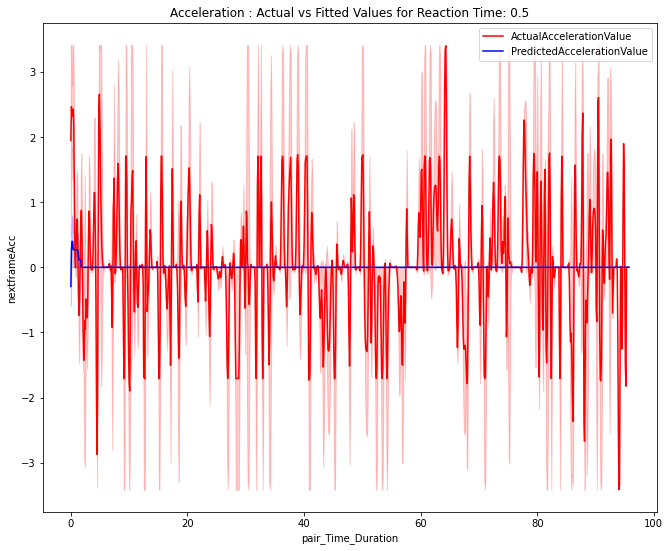

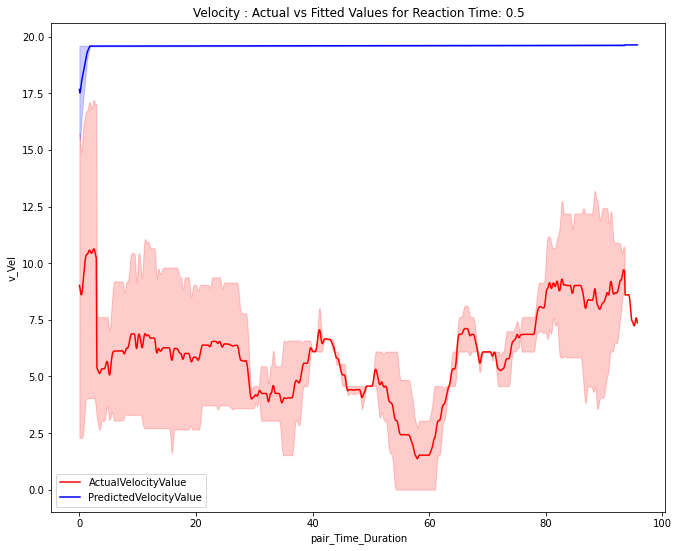

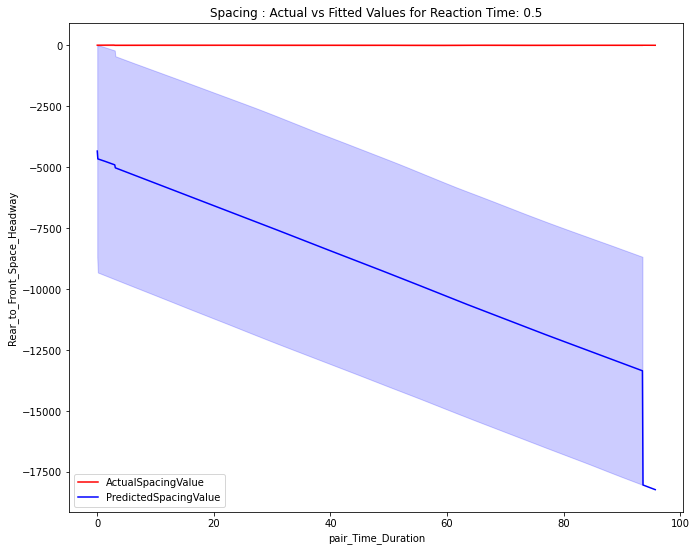

In [ ]:
time_frame=0.5
target_variable = 'nextframeAcc'
model_0_5 = keras.models.load_model("1 Seconds_neural_network_model0.5.keras")


ngsim_0_5=file.read_input('1 Seconds_Removed-ngsim_0_5')
train_df_0_5= file.read_input('1 Seconds_Removed-train_df_0_5')
val_df_0_5=file.read_input('1 Seconds_Removed-val_df_0_5')
test_df_0_5=file.read_input( '1 Seconds_Removed-test_df_0_5')
X_train_0_5= file.read_input('1 Seconds_Removed-X_train_0_5')
y_train_0_5=file.read_input('1 Seconds_Removed-y_train_0_5')

X_val_0_5= file.read_input('1 Seconds_Removed-X_val_0_5')
y_val_0_5= file.read_input('1 Seconds_Removed-y_val_0_5')
X_test_0_5= file.read_input('1 Seconds_Removed-X_test_0_5')
y_test_0_5= file.read_input('1 Seconds_Removed-y_test_0_5')
predicted_data_0_5=file.read_input('1 Seconds_Removed-predicted_data_0_5')

predict_on_pair = model_obj.prediction_test_pairs(test_df_0_5, 10, 12)
#predict_on_pair='279-284'
print(predict_on_pair[0])

predicted_data = model_obj.prediction(test_df_0_5, predict_on_pair, target_variable, model_0_5, time_frame)
prediction_1 = predicted_data[predicted_data["L-F_Pair"]== predict_on_pair[0]]
#prediction_1 = predicted_data[predicted_data["L-F_Pair"]== '279-284']

model_obj.plot_prediction(prediction_1, 'pair_Time_Duration','predicted_acceleration', 'nextframeAcc', 'Acceleration', time_frame)
model_obj.plot_prediction(prediction_1, 'pair_Time_Duration','predicted_velocity', 'nextframesvel', 'Velocity', time_frame)
model_obj.plot_prediction(prediction_1, 'pair_Time_Duration','predicted_spacing', 'nextframeposition', 'Spacing', time_frame)


#ngsim_0_5, train_df_0_5, val_df_0_5, test_df_0_5, X_train_0_5, y_train_0_5, X_val_0_5, y_val_0_5, X_test_0_5, y_test_0_5,predicted_data_0_5,model_0_5 = model_obj.fit_and_run_neural(ngsim, time_frame)


In [ ]:
kjk

NameError: name 'kjk' is not defined

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 6, 1)]            0         
_________________________________________________________________
Block1_Conv1 (Conv1D)        (None, 6, 16)             48        
_________________________________________________________________
Block1_Conv2 (Conv1D)        (None, 6, 16)             528       
_________________________________________________________________
Block1_Pool (MaxPooling1D)   (None, 3, 16)             0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 3, 16)             0         
_________________________________________________________________
Block2_Conv1 (Conv1D)        (None, 3, 32)             1056      
_________________________________________________________________
Block2_Conv2 (Conv1D)        (None, 3, 32)           

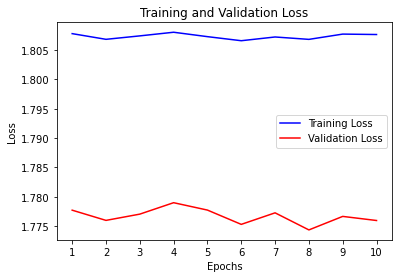

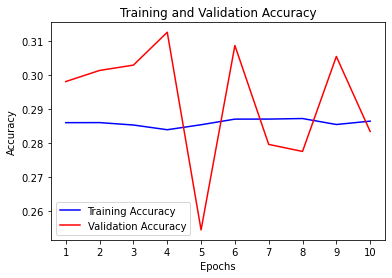

Prediction being done on :247-255
s_subject: 10.668000221252441,s_preceding:11.814048051834106,previous spacing: 16.014192581176758,spacing[j]:17.160240411758423
j: 1,predict_for_input:[[17.16024041  2.          2.          0.02133656 10.66800022  1.        ]],pred_acc: 0.00010844600910786539
s_subject: 10.668054444256995,s_preceding:10.895075663924217,previous spacing: 17.160240411758423,spacing[j]:17.387261631425645
j: 2,predict_for_input:[[ 1.73872616e+01  2.00000000e+00  2.00000000e+00 -9.03538334e-03
   1.06681087e+01  1.00000000e+00]],pred_acc: 0.00010844611097127199
s_subject: 10.668162890266103,s_preceding:10.657332049682736,previous spacing: 17.387261631425645,spacing[j]:17.376430790842278
j: 3,predict_for_input:[[ 1.73764308e+01  2.00000000e+00  2.00000000e+00 -5.87899421e-03
   1.06682171e+01  1.00000000e+00]],pred_acc: 0.00010844611097127199
s_subject: 10.668271336326143,s_preceding:10.643616108223796,previous spacing: 17.376430790842278,spacing[j]:17.35177556273993
j: 4,pr

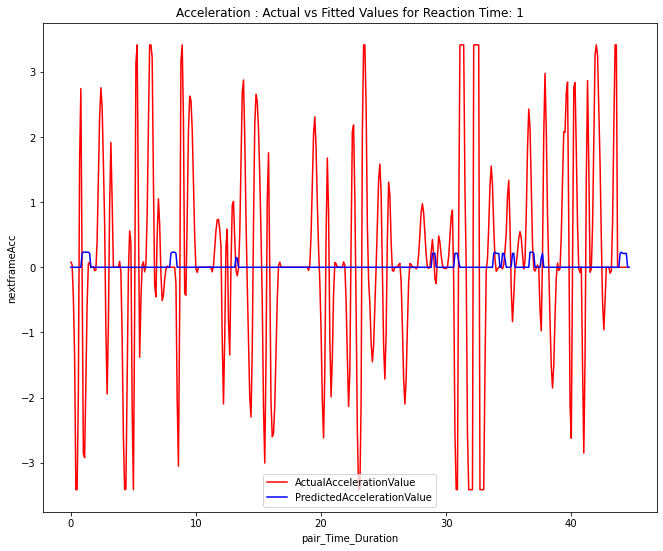

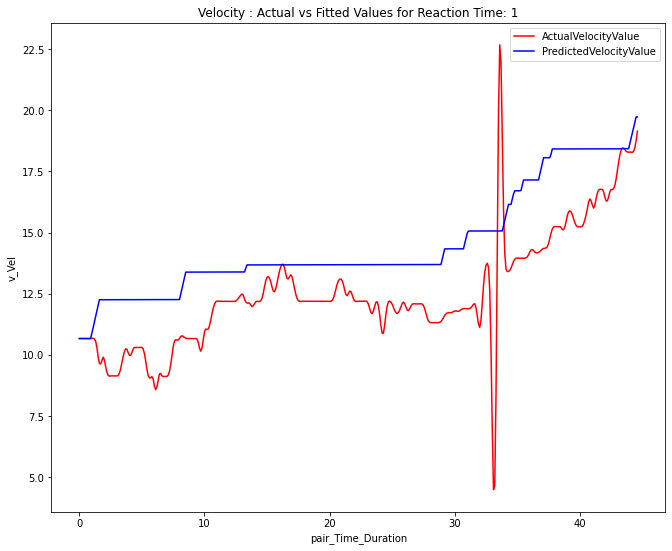

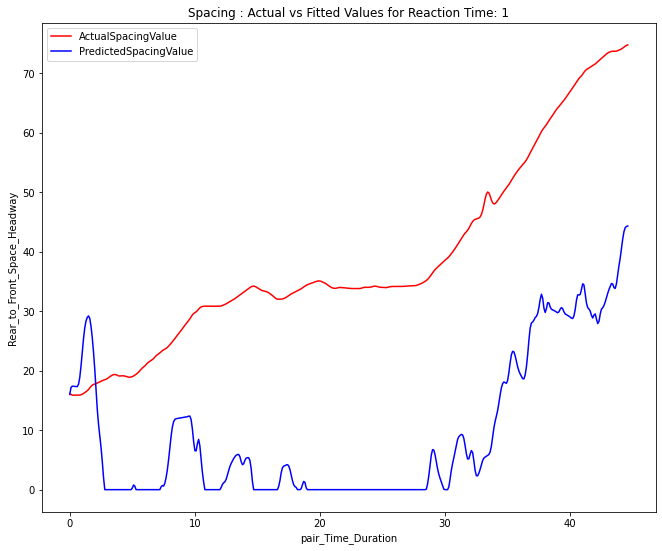

True

In [ ]:
time_frame=1
ngsim_1, train_df_1, val_df_1, test_df_1, X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1,predicted_data_1,model_1= model_obj.fit_and_run_neural(ngsim, time_frame)

file.export_file(ngsim_1, '1 Seconds_Removed-ngsim_1')
file.export_file(train_df_1, '1 Seconds_Removed-train_df_1')
file.export_file(val_df_1, '1 Seconds_Removed-val_df_1')
file.export_file(test_df_1, '1 Seconds_Removed-test_df_1')
file.export_file(X_train_1, '1 Seconds_Removed-X_train_1')
file.export_file(y_train_1, '1 Seconds_Removed-y_train_1')

file.export_file(X_val_1, '1 Seconds_Removed-X_val_1')
file.export_file(y_val_1, '1 Seconds_Removed-y_val_1')
file.export_file(X_test_1, '1 Seconds_Removed-X_test_1')
file.export_file(y_test_1, '1 Seconds_Removed-y_test_1')
file.export_file(predicted_data_1, '1 Seconds_Removed-predicted_data_1')

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 6, 1)]            0         
_________________________________________________________________
Block1_Conv1 (Conv1D)        (None, 6, 16)             48        
_________________________________________________________________
Block1_Conv2 (Conv1D)        (None, 6, 16)             528       
_________________________________________________________________
Block1_Pool (MaxPooling1D)   (None, 3, 16)             0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 3, 16)             0         
_________________________________________________________________
Block2_Conv1 (Conv1D)        (None, 3, 32)             1056      
_________________________________________________________________
Block2_Conv2 (Conv1D)        (None, 3, 32)           

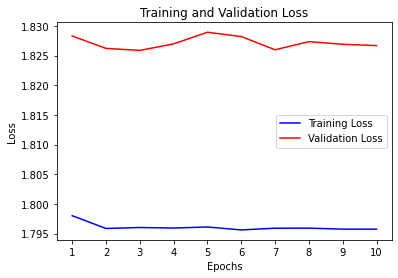

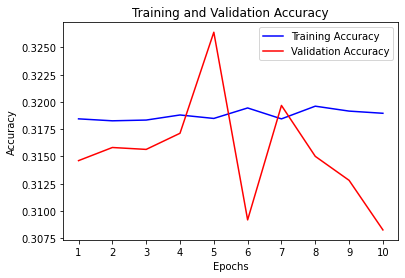

Prediction being done on :411-418
s_subject: 15.239999771118164,s_preceding:15.239999771118164,previous spacing: 10.369296073913574,spacing[j]:10.369296073913574
j: 1,predict_for_input:[[10.36929607  2.          2.          0.          7.61999989  1.        ]],pred_acc: 9.450127981835976e-05
s_subject: 15.2401887736778,s_preceding:15.239999771118164,previous spacing: 10.369296073913574,spacing[j]:10.369107071353937
j: 2,predict_for_input:[[10.36910707  2.          2.          0.04895705  7.62018889  1.        ]],pred_acc: 9.123573545366526e-05
s_subject: 15.240566778797074,s_preceding:13.594079732894897,previous spacing: 10.369107071353937,spacing[j]:8.72262002545176
j: 3,predict_for_input:[[8.72262003 2.         2.         0.15887391 7.62037789 1.        ]],pred_acc: 9.105120261665434e-05
s_subject: 15.240938252827618,s_preceding:12.02131199836731,previous spacing: 8.72262002545176,spacing[j]:5.502993770991452
j: 4,predict_for_input:[[5.50299377 2.         2.         0.23830433 7.6205

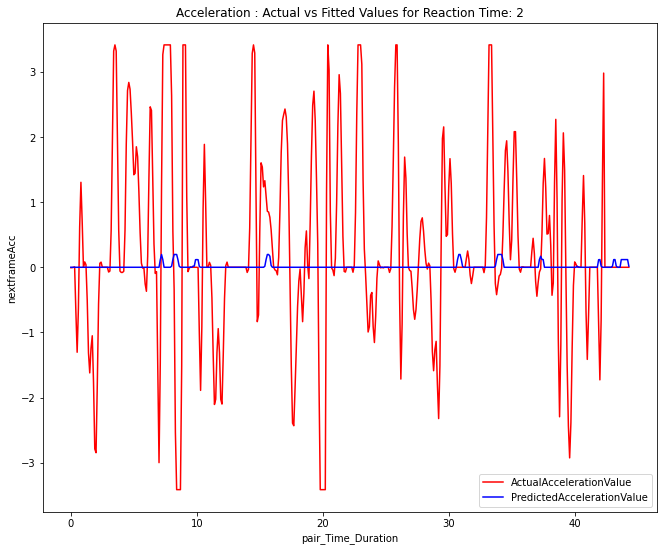

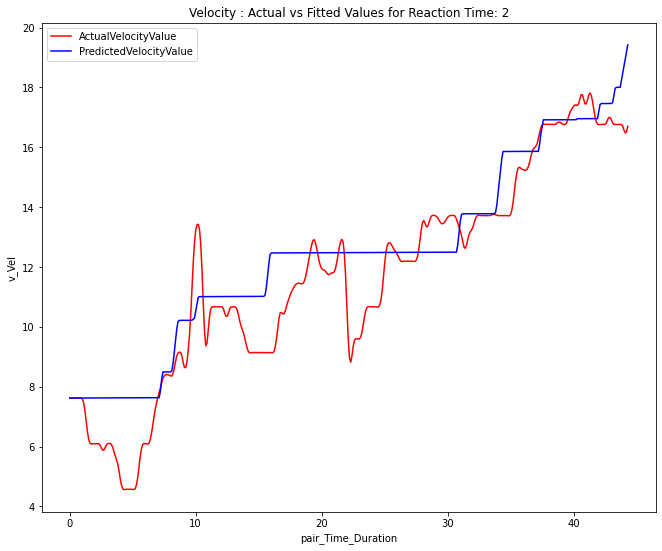

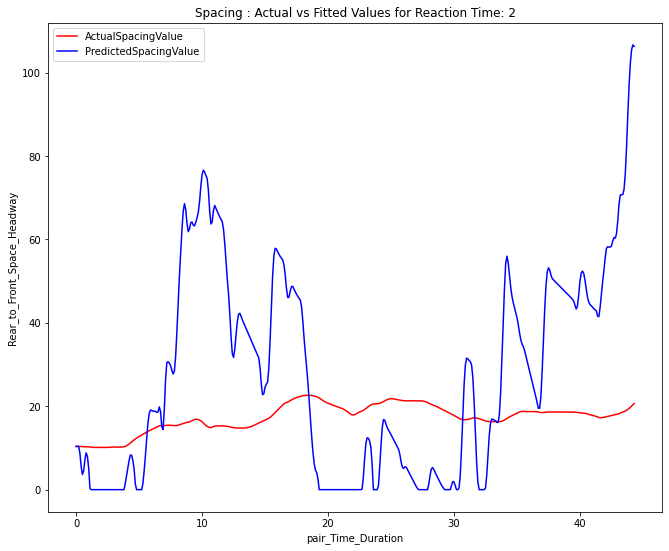

True

In [ ]:
time_frame=2
ngsim_2, train_df_2, val_df_2, test_df_2, X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2,predicted_data_2,model_2= model_obj.fit_and_run_neural(ngsim, time_frame)


file.export_file(ngsim_2, '1 Seconds_Removed-ngsim_2')
file.export_file(train_df_2, '1 Seconds_Removed-train_df_2')
file.export_file(val_df_2, '1 Seconds_Removed-val_df_2')
file.export_file(test_df_2, '1 Seconds_Removed-test_df_2')
file.export_file(X_train_2, '1 Seconds_Removed-X_train_2')
file.export_file(y_train_2, '1 Seconds_Removed-y_train_2')

file.export_file(X_val_2, '1 Seconds_Removed-X_val_2')
file.export_file(y_val_2, '1 Seconds_Removed-y_val_2')
file.export_file(X_test_2, '1 Seconds_Removed-X_test_2')
file.export_file(y_test_2, '1 Seconds_Removed-y_test_2')
file.export_file(predicted_data_2, '1 Seconds_Removed-predicted_data_2')

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 6, 1)]            0         
_________________________________________________________________
Block1_Conv1 (Conv1D)        (None, 6, 16)             48        
_________________________________________________________________
Block1_Conv2 (Conv1D)        (None, 6, 16)             528       
_________________________________________________________________
Block1_Pool (MaxPooling1D)   (None, 3, 16)             0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 3, 16)             0         
_________________________________________________________________
Block2_Conv1 (Conv1D)        (None, 3, 32)             1056      
_________________________________________________________________
Block2_Conv2 (Conv1D)        (None, 3, 32)           

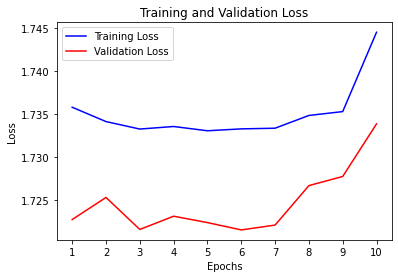

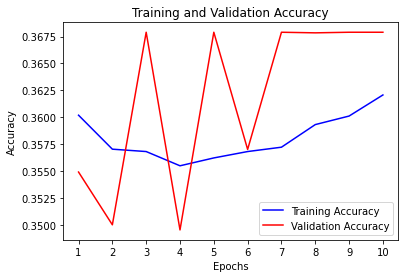

Prediction being done on :237-247
s_subject: 55.21451950073242,s_preceding:53.34000110626221,previous spacing: 27.50921630859375,spacing[j]:25.634697914123535
j: 1,predict_for_input:[[25.63469791  3.          2.          0.37490368 11.0429039   1.        ]],pred_acc: 0.024031221866607666
s_subject: 55.51490977406502,s_preceding:53.34000110626221,previous spacing: 25.634697914123535,spacing[j]:23.459789246320724
j: 2,predict_for_input:[[23.45978925  3.          2.          0.49505979 11.16306001  1.        ]],pred_acc: 0.024031221866607666
s_subject: 56.11569032073021,s_preceding:53.34000110626221,previous spacing: 23.459789246320724,spacing[j]:20.684100031852722
j: 3,predict_for_input:[[20.68410003  3.          2.          0.67922366 11.28321612  1.        ]],pred_acc: 0.024031221866607666
s_subject: 56.7164708673954,s_preceding:40.06596267223358,previous spacing: 20.684100031852722,spacing[j]:4.033591836690903
j: 4,predict_for_input:[[ 4.03359184  3.          2.          0.94873184 11

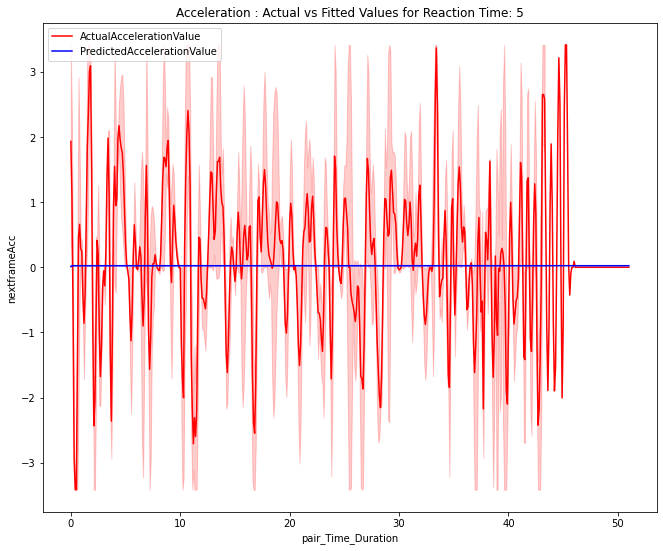

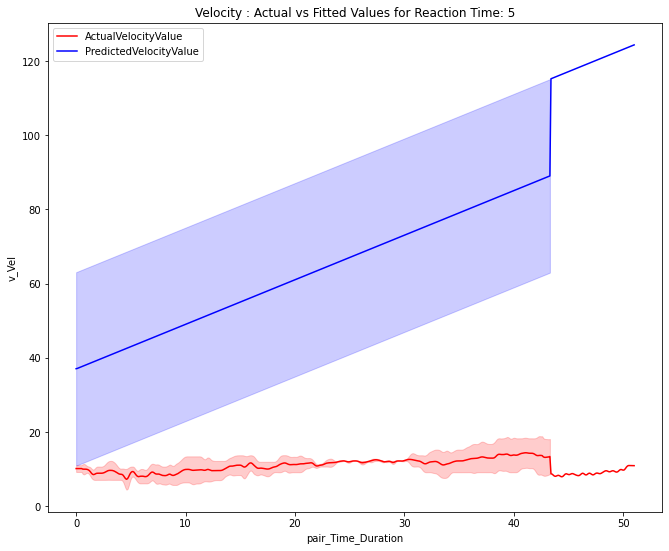

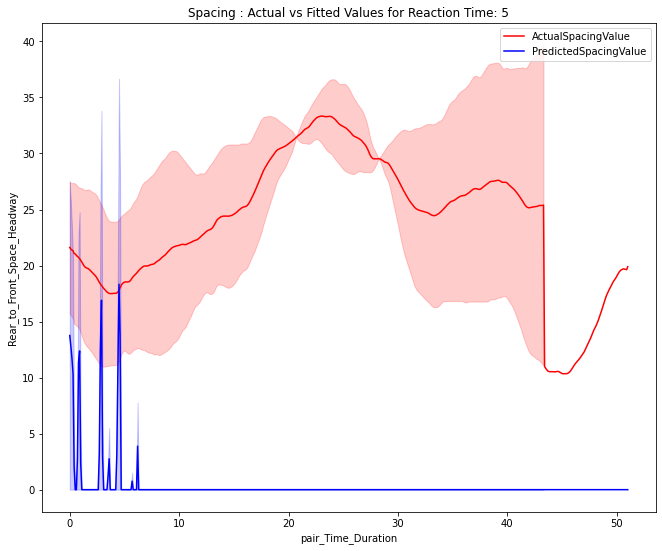

True

In [ ]:
time_frame=5
ngsim_5, train_df_5, val_df_5, test_df_5, X_train_5, y_train_5, X_val_5, y_val_5, X_test_5, y_test_5,predicted_data_5,model_5= model_obj.fit_and_run_neural(ngsim, time_frame)


file.export_file(ngsim_5, '1 Seconds_Removed-ngsim_5')
file.export_file(train_df_5, '1 Seconds_Removed-train_df_5')
file.export_file(val_df_5, '1 Seconds_Removed-val_df_5')
file.export_file(test_df_5, '1 Seconds_Removed-test_df_5')
file.export_file(X_train_5, '1 Seconds_Removed-X_train_5')
file.export_file(y_train_5, '1 Seconds_Removed-y_train_5')

file.export_file(X_val_5, '1 Seconds_Removed-X_val_5')
file.export_file(y_val_5, '1 Seconds_Removed-y_val_5')
file.export_file(X_test_5, '1 Seconds_Removed-X_test_5')
file.export_file(y_test_5, '1 Seconds_Removed-y_test_5')
file.export_file(predicted_data_5, '1 Seconds_Removed-predicted_data_5')

Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 6, 1)]            0         
_________________________________________________________________
Block1_Conv1 (Conv1D)        (None, 6, 16)             48        
_________________________________________________________________
Block1_Conv2 (Conv1D)        (None, 6, 16)             528       
_________________________________________________________________
Block1_Pool (MaxPooling1D)   (None, 3, 16)             0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 3, 16)             0         
_________________________________________________________________
Block2_Conv1 (Conv1D)        (None, 3, 32)             1056      
_________________________________________________________________
Block2_Conv2 (Conv1D)        (None, 3, 32)           

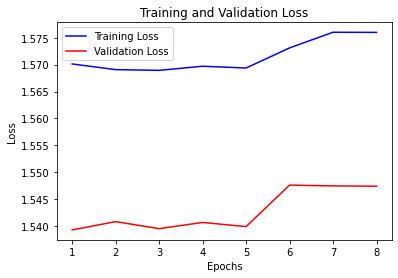

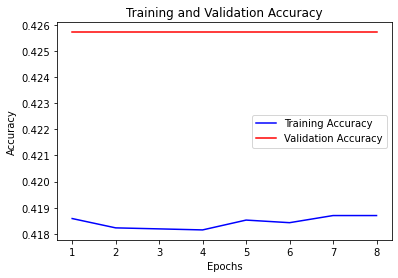

Prediction being done on :184-196
s_subject: 121.92000389099121,s_preceding:183.5810351371765,previous spacing: 18.973800659179688,spacing[j]:80.63483190536499
j: 1,predict_for_input:[[80.63483191  2.          2.          0.57912064 12.19200039  1.        ]],pred_acc: 0.03240668773651123
s_subject: 123.54033827781677,s_preceding:142.3415970802307,previous spacing: 80.63483190536499,spacing[j]:99.43609070777893
j: 2,predict_for_input:[[99.43609071  2.          2.          0.86965919 12.51606727  1.        ]],pred_acc: 0.03240668773651123
s_subject: 126.7810070514679,s_preceding:117.22608079202473,previous spacing: 99.43609070777893,spacing[j]:89.88116444833577
j: 3,predict_for_input:[[89.88116445  2.          2.          1.19372606 12.84013414  1.        ]],pred_acc: 0.03240668773651123
s_subject: 130.02167582511902,s_preceding:113.41608088463545,previous spacing: 89.88116444833577,spacing[j]:73.2755695078522
j: 4,predict_for_input:[[73.27556951  2.          2.          1.514745   13.16

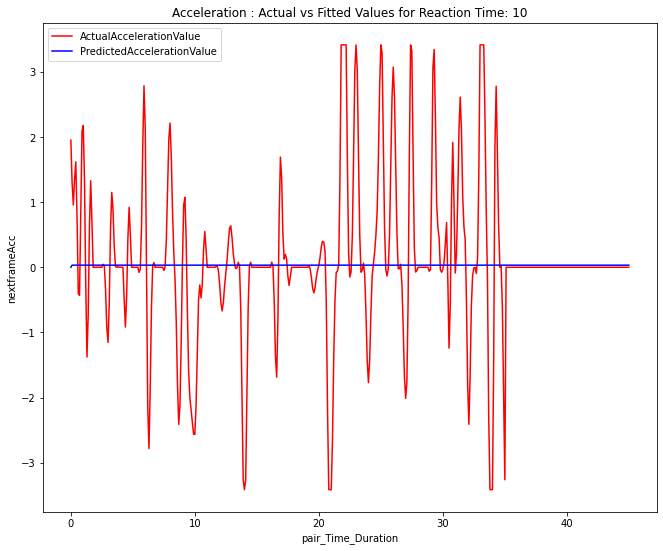

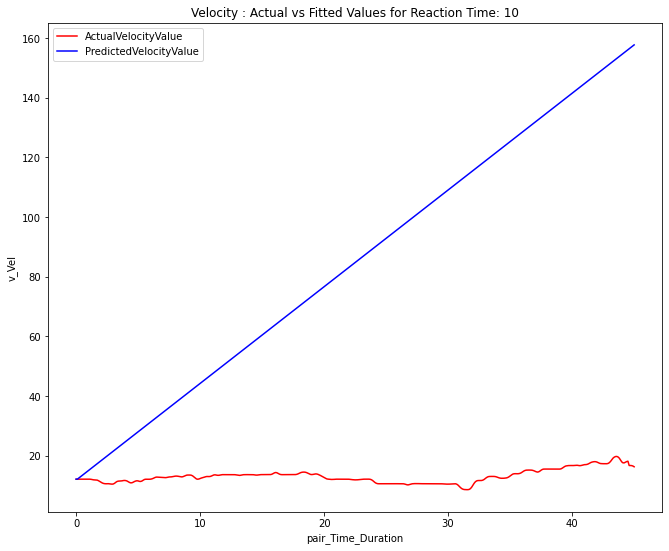

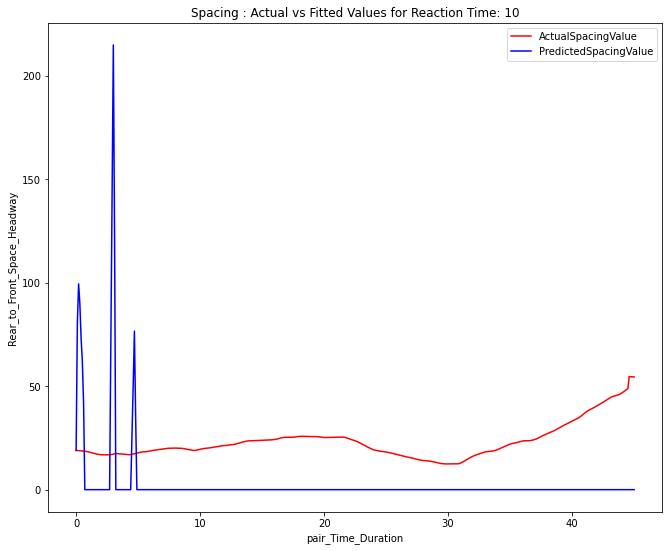

True

In [ ]:
time_frame=10
ngsim_10, train_df_10, val_df_10, test_df_10, X_train_10, y_train_10, X_val_10, y_val_10, X_test_10, y_test_10,predicted_data_10,model_10= model_obj.fit_and_run_neural(ngsim, time_frame)



file.export_file(ngsim_10, '1 Seconds_Removed-ngsim_10')
file.export_file(train_df_10, '1 Seconds_Removed-train_df_10')
file.export_file(val_df_10, '1 Seconds_Removed-val_df_10')
file.export_file(test_df_10, '1 Seconds_Removed-test_df_10')
file.export_file(X_train_10, '1 Seconds_Removed-X_train_10')
file.export_file(y_train_10, '1 Seconds_Removed-y_train_10')

file.export_file(X_val_10, '1 Seconds_Removed-X_val_10')
file.export_file(y_val_10, '1 Seconds_Removed-y_val_10')
file.export_file(X_test_10, '1 Seconds_Removed-X_test_10')
file.export_file(y_test_10, '1 Seconds_Removed-y_test_10')
file.export_file(predicted_data_10, '1 Seconds_Removed-predicted_data_10')